# Multiple Linear Regression
## Bike Sharing Assignment

##### These are the following steps need to be performed
- Data understanding
- Data Visualisation 
- Data preparation
- Data Modeling and evaluation

## 1.Data understanding
 importing all the required liberaries and reading the data from csv file to further analysis and for understanding

In [1]:
# Importing Liberaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 

* Remove unnecessary warnings

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading the dataset
bikers_df=pd.read_csv('day.csv')
# Set the max column display as 100
pd.set_option('display.max_columns',100)

In [4]:
# Displaying the first 10 row data
bikers_df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [5]:
# Shape of the dataframe
print('Shape of bikers dataframe is :')
bikers_df.shape

Shape of bikers dataframe is :


(730, 16)

In [6]:
# info of the dataframe
bikers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# Display the null data percentage in each column
round((bikers_df.isnull().sum(axis=0)/len(bikers_df))*100,2)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [8]:
#Display the percentage of missing values in the columns
round(100*(bikers_df.isnull().sum()/len(bikers_df)), 2)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [9]:
#Display the null value percentage in each row
round((bikers_df.isnull().sum(axis=1)/len(bikers_df))*100,2)

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
725    0.0
726    0.0
727    0.0
728    0.0
729    0.0
Length: 730, dtype: float64

In [10]:
# Display the description of dataframe
bikers_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [11]:
# Displaying all the avaialble columns name in dataframe
bikers_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [12]:
# Dropping unnecessary columns
bikers_df.drop(['instant','dteday'],axis=1,inplace=True)
bikers_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [13]:
# Defining the value of all season values and converting the season column to numeric

season_val={1:'spring', 2:'summer', 3:'fall', 4:'winter'}

In [14]:
# updating the value in dataframe with string values for better readability in season column
bikers_df.season=bikers_df.season.map(season_val)

In [15]:
# calculate the values count on the season column
bikers_df.season.astype('category').value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [16]:
# calculate the values count on the year column
bikers_df.yr.astype('category').value_counts()

0    365
1    365
Name: yr, dtype: int64

In [17]:
# Defining the value of all month in the month map
month_map={1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul',8: 'Aug',9: 'Sept',10: 'Oct',11: 'Nov',12: 'Dec'}

In [18]:
# updating the value in dataframe with string values for better readability in month column
bikers_df.mnth=bikers_df.mnth.map(month_map)
bikers_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,Jan,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,Jan,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,Jan,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,Jan,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,Jan,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [19]:
# calculate the values count on the month column
bikers_df.mnth.astype('category').value_counts()

Aug     62
Dec     62
Jan     62
Jul     62
Mar     62
May     62
Oct     62
Apr     60
Jun     60
Nov     60
Sept    60
Feb     56
Name: mnth, dtype: int64

In [20]:
# Defining the value of weekday in weekday map 
# ranking is due to dataset as 1-1-2018 is mon and 6
weekday_map={1: 'Wed', 2: 'Thurs', 3: 'Fri', 4: 'Sat', 5: 'Sun', 6: 'Mon', 0: 'Tues'}

In [21]:
# updating the value in dataframe with string values for better readability in weekday column
bikers_df.weekday=bikers_df.weekday.map(weekday_map)
bikers_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,Jan,0,Mon,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,Jan,0,Tues,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,Jan,0,Wed,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,Jan,0,Thurs,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,Jan,0,Fri,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [22]:
# calculate the values count on the weekday column
bikers_df.weekday.astype('category').value_counts()

Mon      105
Tues     105
Wed      105
Sat      104
Sun      104
Thurs    104
Fri      103
Name: weekday, dtype: int64

In [23]:
# calculate the values count on the holiday column
bikers_df.holiday.astype('category').value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [24]:
# calculate the values count on the working day column
bikers_df.workingday.astype('category').value_counts()

1    499
0    231
Name: workingday, dtype: int64

In [25]:
# Defining the value of weathersit column into short forms
# 1-Clear, Few clouds, Partly cloudy, Partly cloudy
# 2-Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# 3-Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# 4-Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
weathersit_map={1:'Clear',2:'Mist',3:'Light_Snow',4:'Heavy_Rain'}

In [26]:
# updating the value in dataframe with string values for better readability in weathersit column
bikers_df.weathersit=bikers_df.weathersit.map(weathersit_map)
bikers_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,Jan,0,Mon,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,Jan,0,Tues,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,Jan,0,Thurs,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [27]:
# calculate the values count on the weathersit day column
bikers_df.weathersit.astype('category').value_counts()

Clear         463
Mist          246
Light_Snow     21
Name: weathersit, dtype: int64

# 2.Data Visualisation

 * Visualising the numerical and categorical data

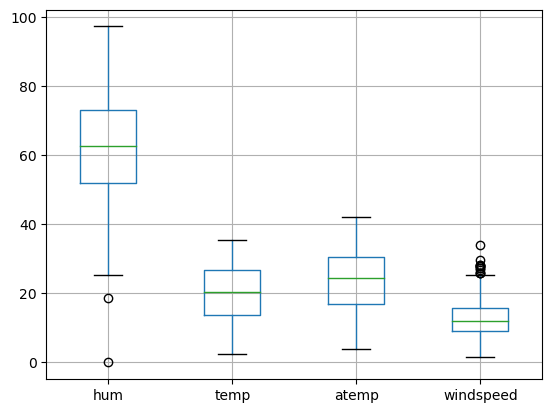

In [28]:
# Box plot for the numerical columns to identify the outliers
bikers_df.boxplot(['hum','temp','atemp','windspeed'])
plt.show()

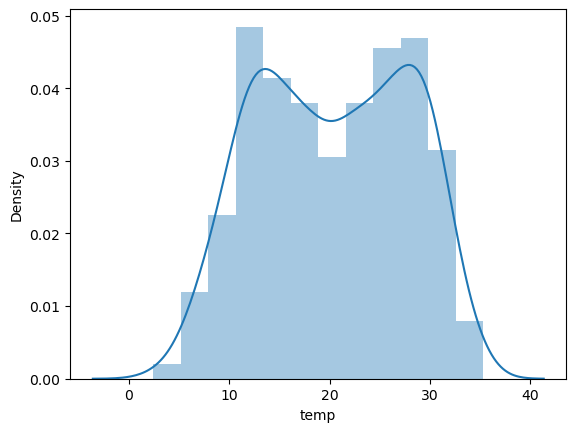

In [29]:
# temperature distributionPlot
sns.distplot(bikers_df.temp)
plt.show()

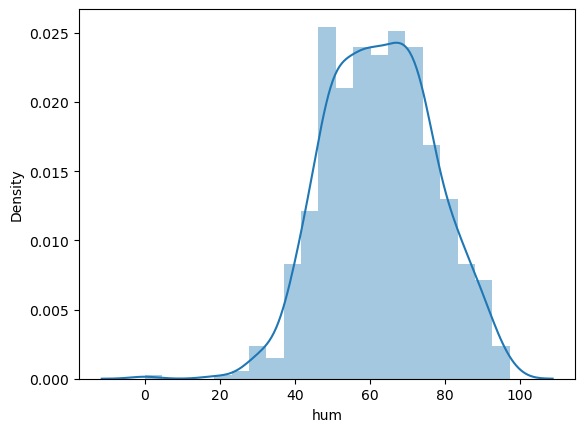

In [30]:
# humidity
sns.distplot(bikers_df.hum)
plt.show()

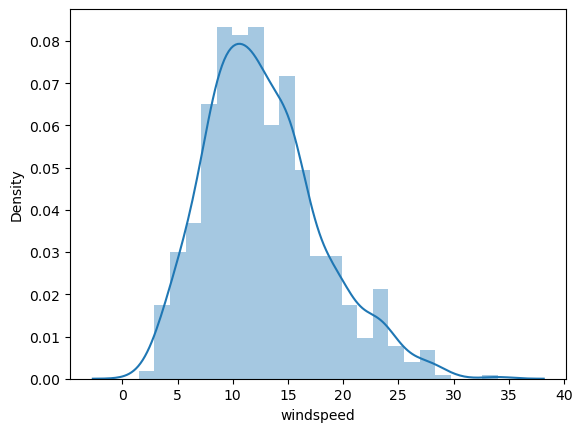

In [31]:
# windspeed
sns.distplot(bikers_df.windspeed)
plt.show()

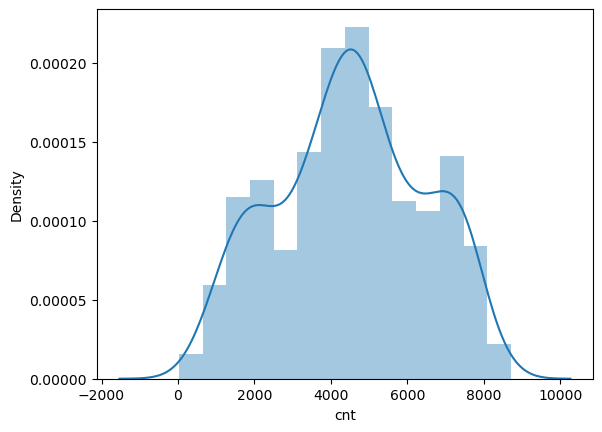

In [32]:
# cnt
sns.distplot(bikers_df.cnt)
plt.show()

* categorical Columns

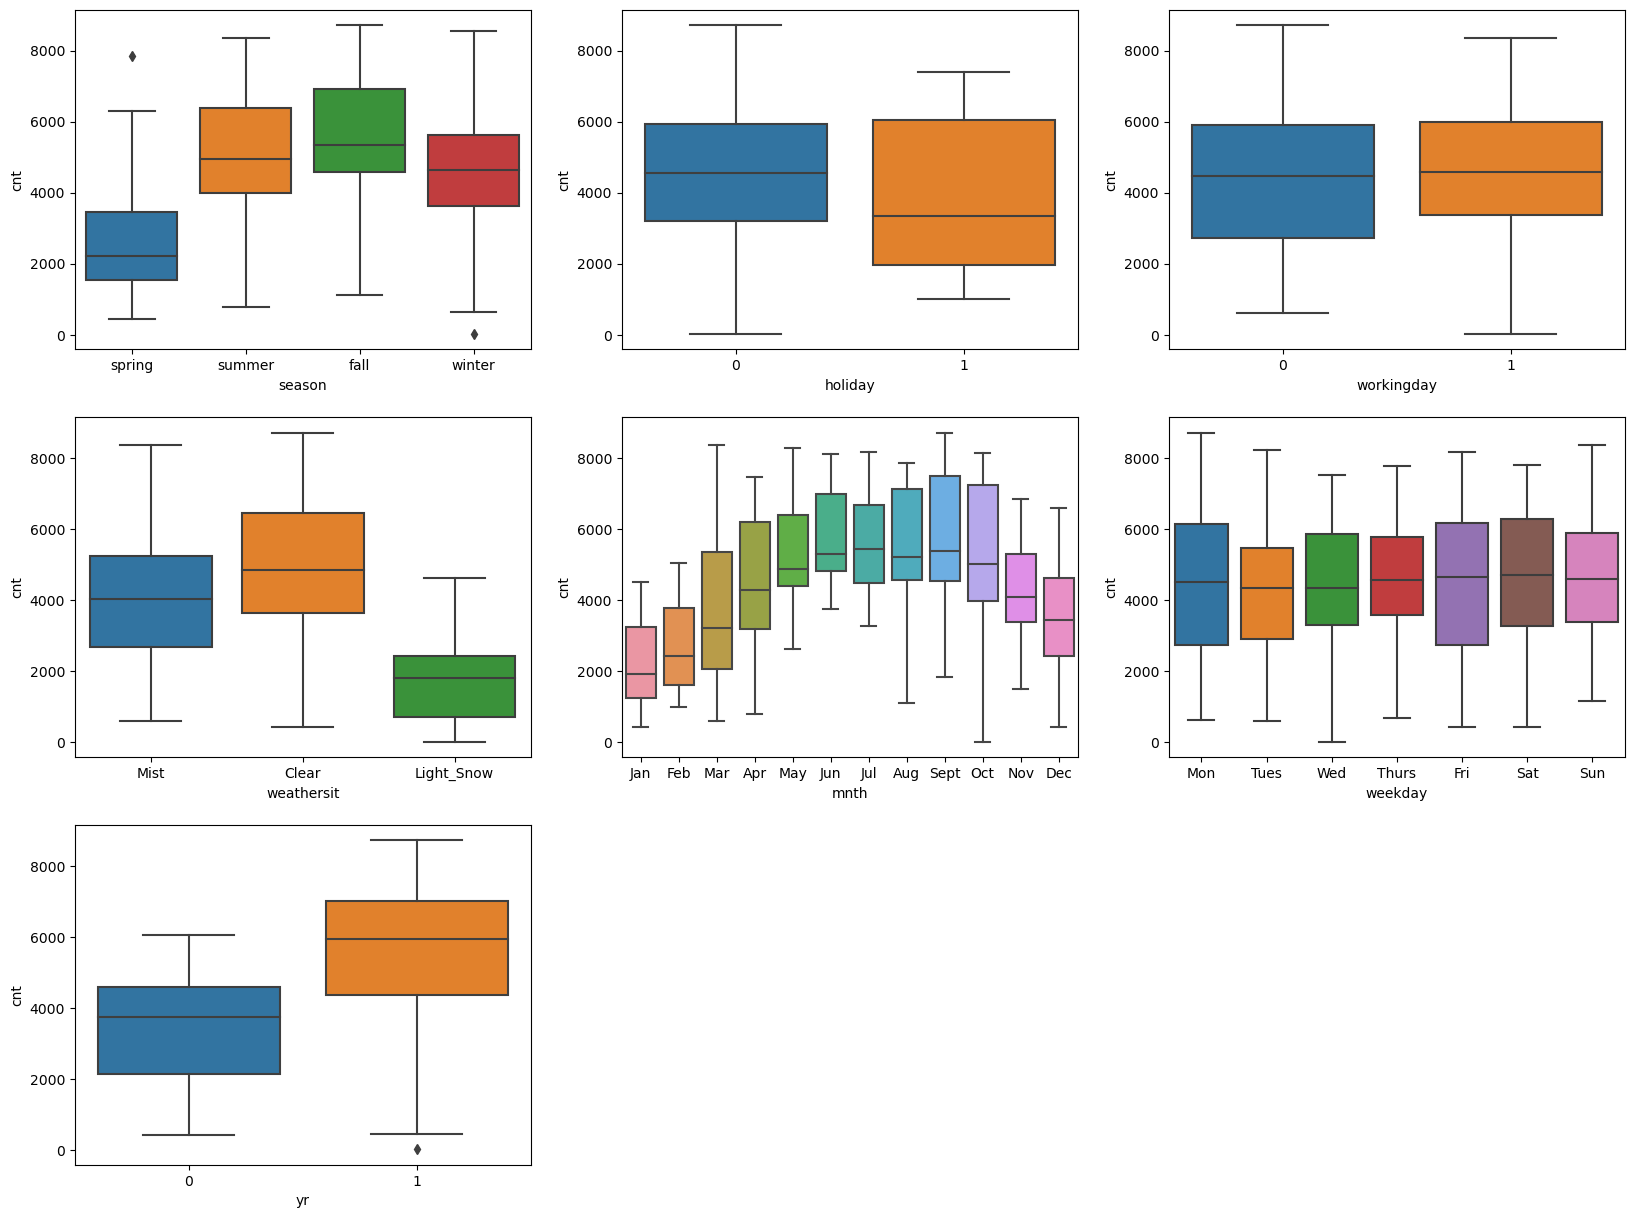

In [33]:
plt.figure(figsize=(20, 15))  
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikers_df)
plt.subplot(3,3,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikers_df)
plt.subplot(3,3,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikers_df)
plt.subplot(3,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikers_df)
plt.subplot(3,3,5)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikers_df)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikers_df)
plt.subplot(3,3,7)
sns.boxplot(x = 'yr', y = 'cnt', data = bikers_df)
plt.show()

* Numerical Columns pairplot

In [34]:
# convert all numeric to a single data Type
bikers_df['casual']= bikers_df['casual'].astype('float')
bikers_df['registered']=bikers_df['registered'].astype('float')
bikers_df['cnt']=bikers_df['cnt'].astype('float')
bikers_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,Jan,0,Mon,0,Mist,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,spring,0,Jan,0,Tues,0,Mist,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,spring,0,Jan,0,Thurs,1,Clear,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0


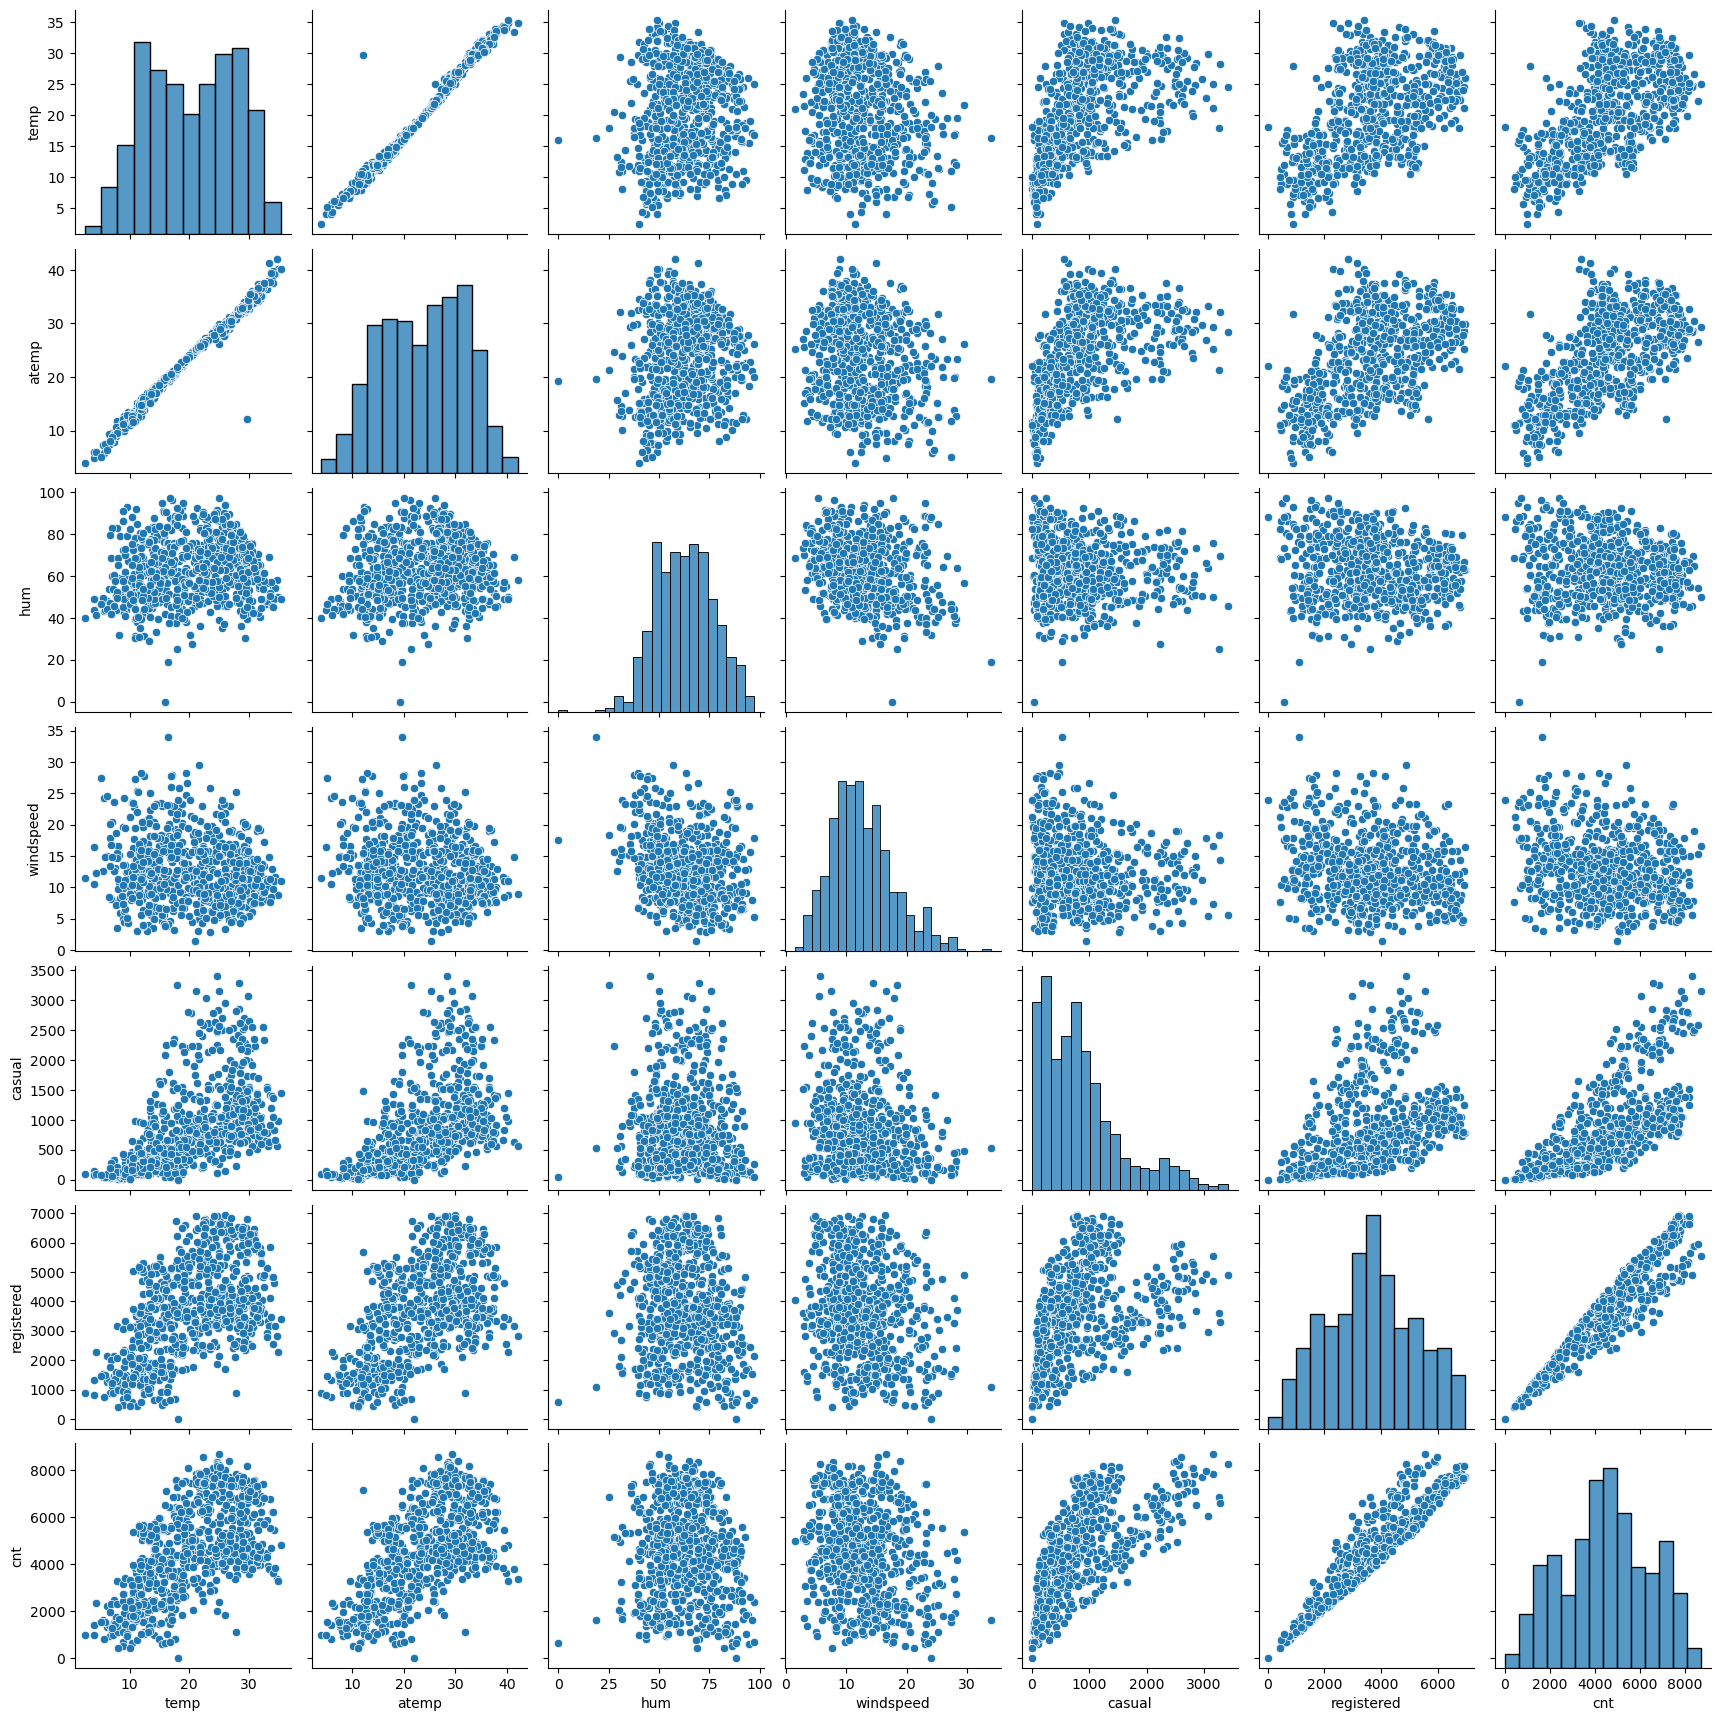

In [35]:
sns.pairplot(bikers_df.select_dtypes(include=['float64']))
plt.show()

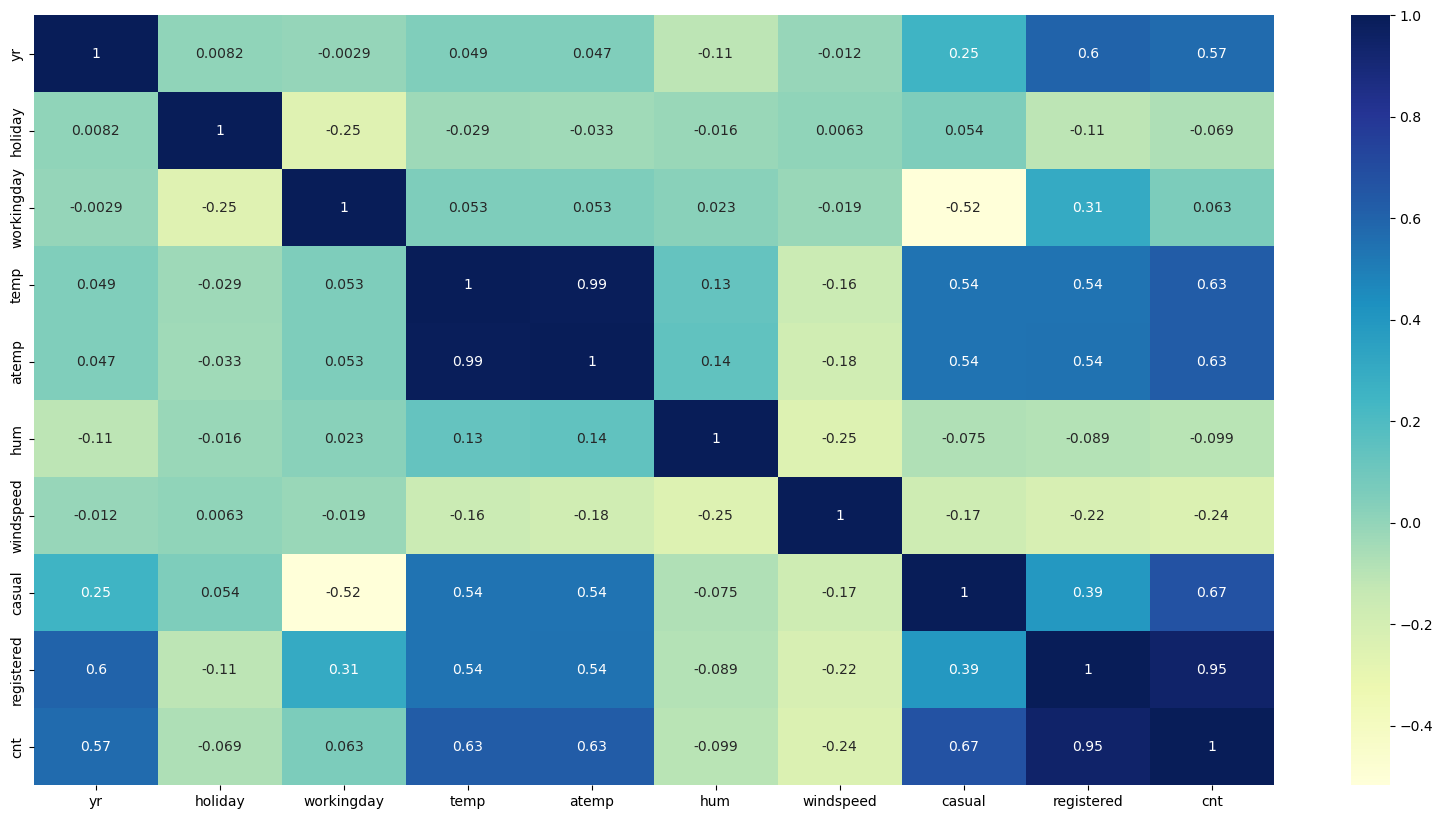

In [36]:
plt.figure(figsize=(20,10))
sns.heatmap(bikers_df.corr(),annot=True,cmap="YlGnBu")
plt.show()

# 3.Data Preparation

In [37]:
bikers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    float64
 12  registered  730 non-null    float64
 13  cnt         730 non-null    float64
dtypes: float64(7), int64(3), object(4)
memory usage: 80.0+ KB


In [38]:
# Filtering out all the categorical columns
bikers_categorical=bikers_df.select_dtypes(include=['object'])

In [39]:
# Creating dummies for all categorical values
bikers_df_dummies=pd.get_dummies(bikers_categorical, drop_first=True)
bikers_df_dummies.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Light_Snow,weathersit_Mist
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [40]:
# dropping the categorical columns
bikers_df.drop(list(bikers_categorical.columns),axis=1,inplace=True)
bikers_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
0,0,0,0,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0


In [41]:
# Merging the dummies columns with main dataframe
bikers_df=pd.concat([bikers_df,bikers_df_dummies],axis=1)
bikers_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Light_Snow,weathersit_Mist
0,0,0,0,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [42]:
# Dropping the registered and casual columns as there no use in data modeling 
bikers_df.drop(['registered','casual'],axis=1,inplace=True)

In [43]:
bikers_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Light_Snow,weathersit_Mist
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# 4.Data Modeling and evaluation

In [44]:
# Spliting the dataset into train and test model
df_train, df_test = train_test_split(bikers_df, train_size=0.7, test_size=0.3, random_state=100)

In [45]:
# view train data set
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Light_Snow,weathersit_Mist
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [46]:
# Shape of train data set
df_train.shape

(510, 30)

In [47]:
# View test data set
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Light_Snow,weathersit_Mist
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
299,0,0,1,19.270000,22.85230,81.2917,13.250121,2659.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
152,0,0,1,29.315000,32.19710,30.5000,19.583229,4968.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [48]:
# Shape of test Data set
df_test.shape

(219, 30)

* Min-Max Scaling on train data set

In [49]:
# Creating object
scaler=MinMaxScaler()

In [50]:
numerical_cols=list((bikers_df.select_dtypes(['float64'])).columns)

In [51]:
print(numerical_cols)

['temp', 'atemp', 'hum', 'windspeed', 'cnt']


In [52]:
df_train[numerical_cols]=scaler.fit_transform(df_train[numerical_cols])

In [53]:
# View the train dataset after scaling
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Light_Snow,weathersit_Mist
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


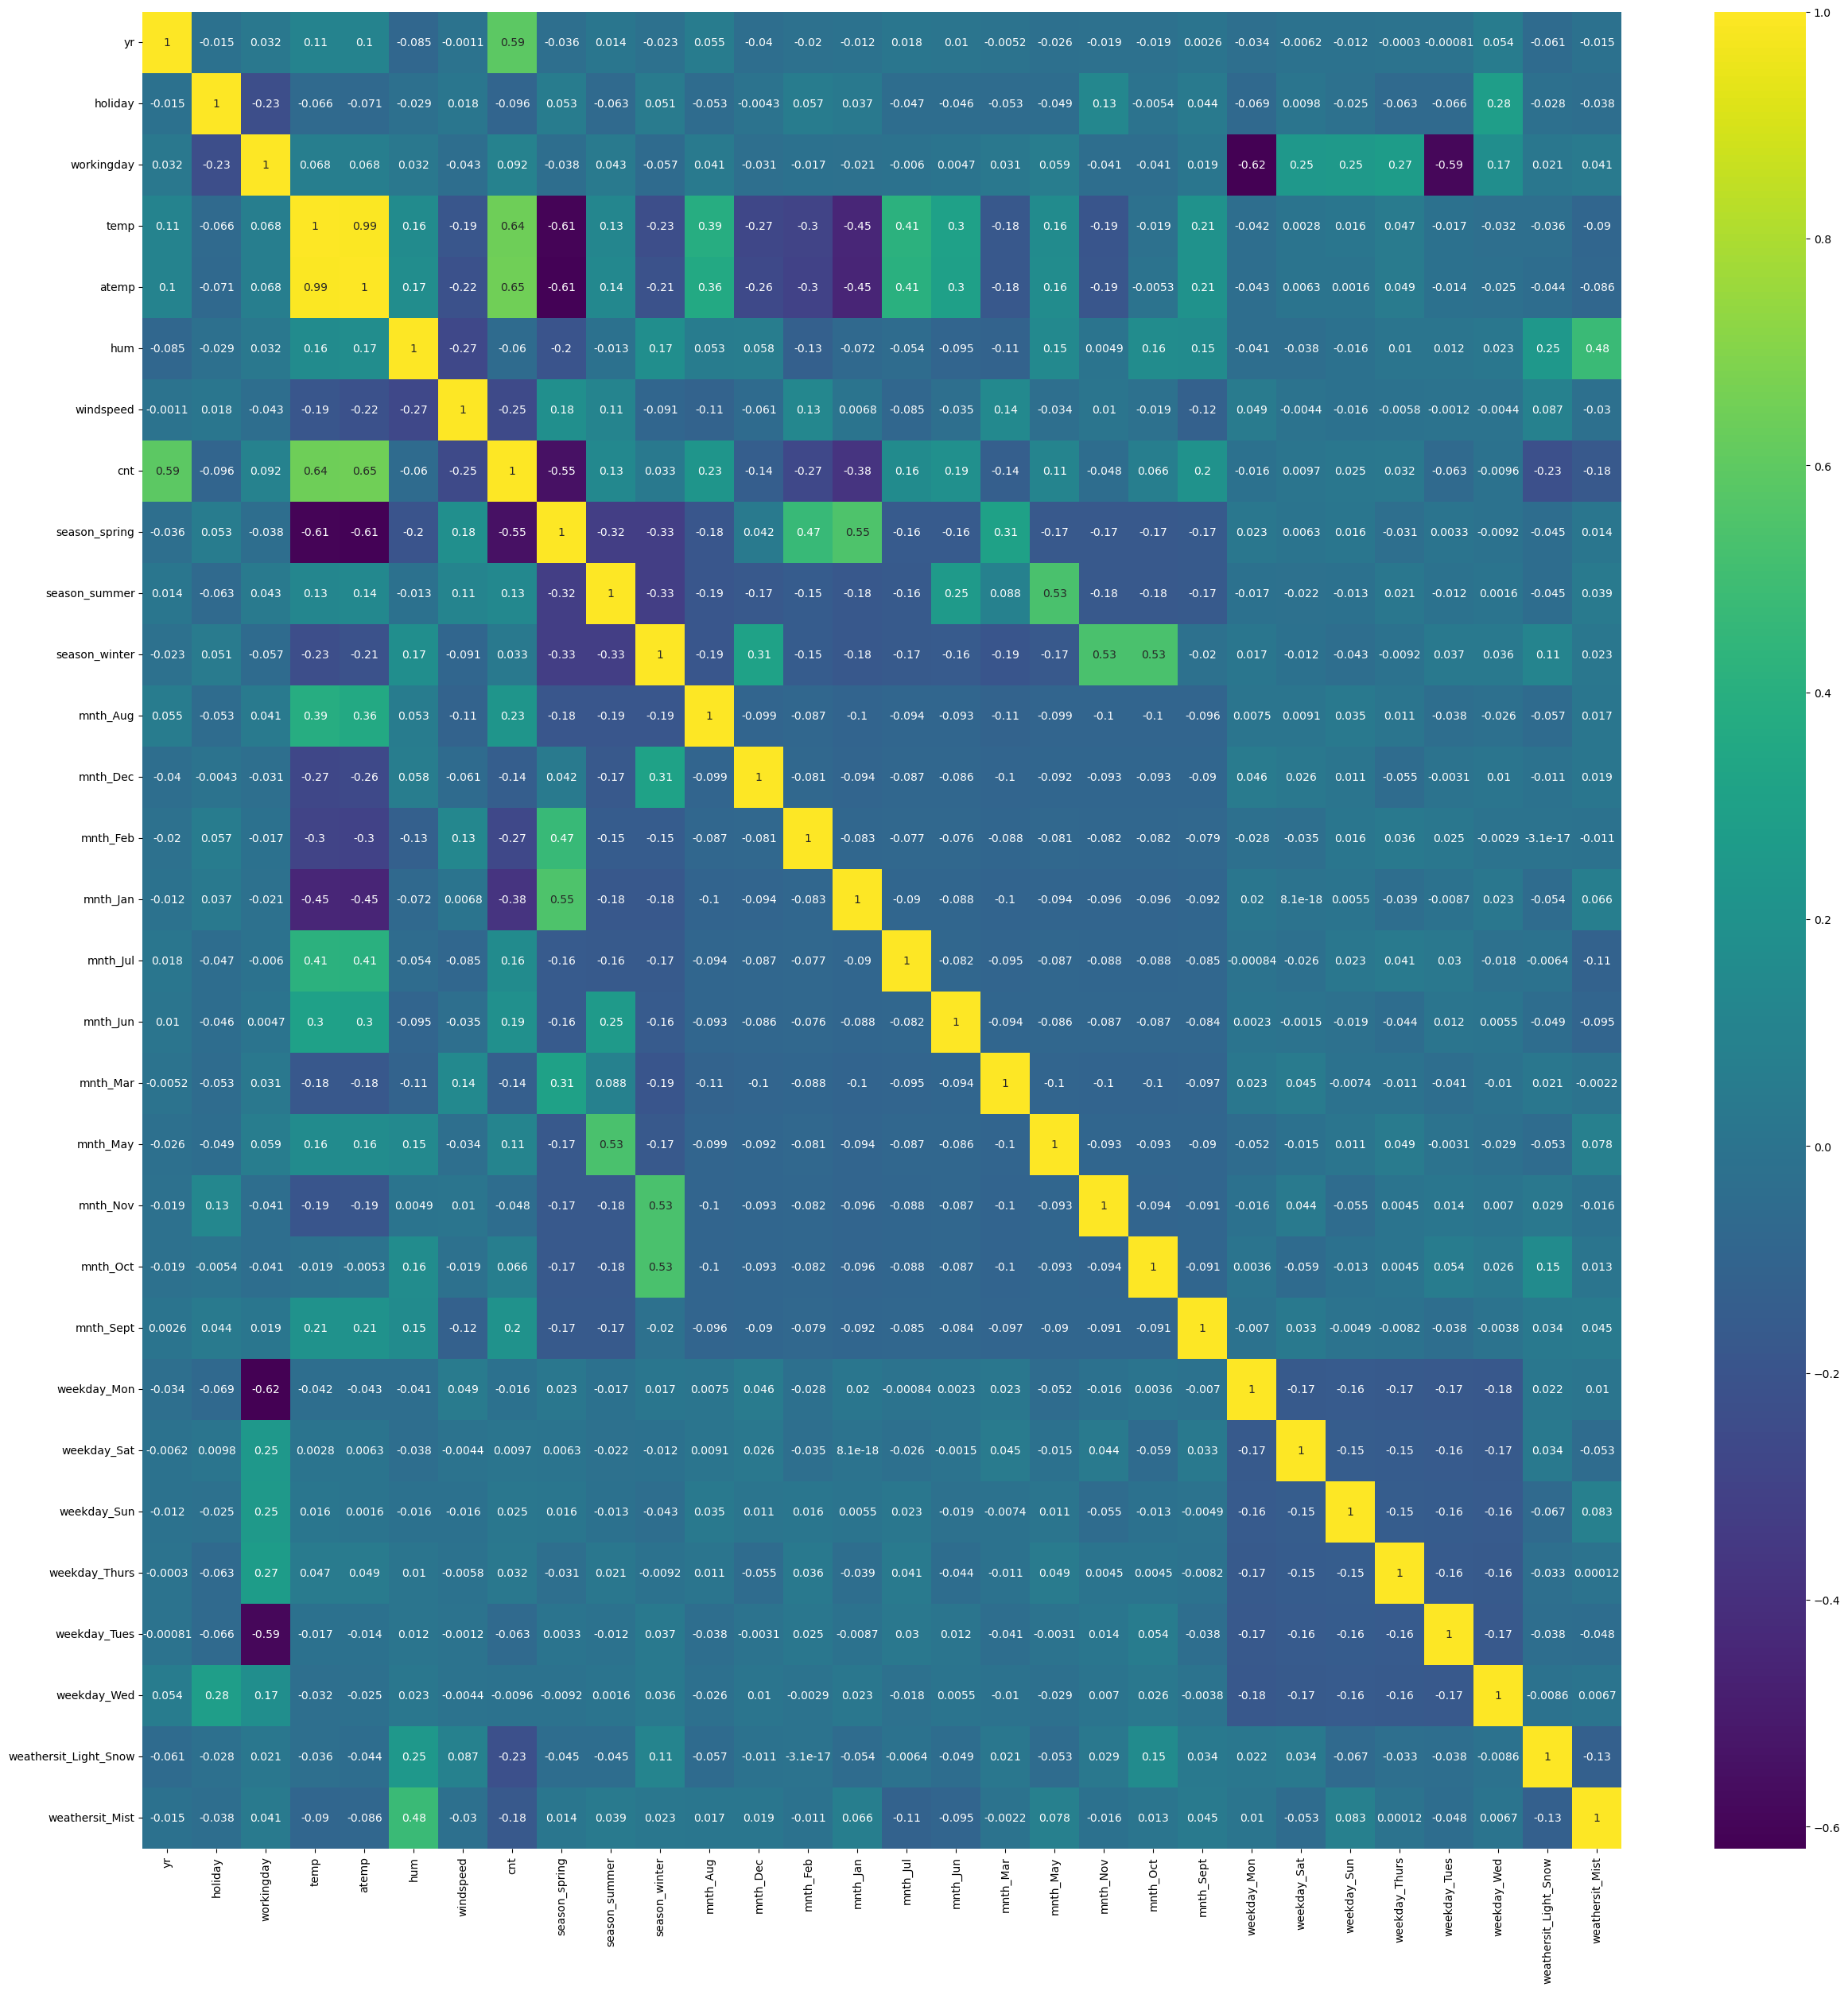

In [54]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (30, 30))
sns.heatmap(df_train.corr(), annot = True, cmap="viridis")
plt.show()

* X and Y set for Model Building

In [55]:
y_train=df_train.pop('cnt')
X_train=df_train

In [56]:
# view the X_train data
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Light_Snow,weathersit_Mist
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [57]:
# Shape of X_train
X_train.shape

(510, 29)

* Model Building with all the feature

In [58]:
import statsmodels.api as sm 
X_train_lm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const                    0.242943
yr                       0.232208
holiday                  0.007249
workingday               0.093522
temp                     0.401322
atemp                    0.050628
hum                     -0.151812
windspeed               -0.184388
season_spring           -0.048580
season_summer            0.038216
season_winter            0.105387
mnth_Aug                 0.016076
mnth_Dec                -0.045572
mnth_Feb                -0.032176
mnth_Jan                -0.062565
mnth_Jul                -0.039277
mnth_Jun                -0.001704
mnth_Mar                 0.001288
mnth_May                 0.024691
mnth_Nov                -0.041783
mnth_Oct                 0.007695
mnth_Sept                0.081806
weekday_Mon              0.098352
weekday_Sat             -0.004017
weekday_Sun              0.005733
weekday_Thurs           -0.013575
weekday_Tues             0.043820
weekday_Wed             -0.015769
weathersit_Light_Snow   -0.256697
weathersit_Mis

In [59]:
 #Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [60]:
# Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[ 0.2322076  -0.05348668  0.03278612  0.40132173  0.05062751 -0.15181212
 -0.18438787 -0.04858014  0.03821569  0.10538739  0.01607601 -0.04557179
 -0.03217603 -0.06256549 -0.03927667 -0.00170354  0.00128797  0.02469107
 -0.0417827   0.00769492  0.08180574  0.03761659 -0.00401705  0.00573276
 -0.01357547 -0.01691602 -0.01576919 -0.25669709 -0.06103021]
0.30367930472267635


In [61]:
# Getting the Summary
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.96
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          8.42e-181
Time:                        00:36:07   Log-Likelihood:                 528.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     481   BIC:                            -875.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2429      0.035      6.848      0.000       0.173       0.313
yr                        0.2322      0.008     28.792      0.000       0.216       0.248
holiday                   0.0072      0.024      0.299      0.765      -0.040       0.055
workingday                0.0935      0.012      7.762      0.000       0.070       0.117
temp                      0.4013      0.142      2.821      0.005       0.122       0.681
atemp                     0.0506      0.138      0.366      0.714      -0.221       0.322
hum                      -0.1518      0.039     -3.940      0.000      -0.228      -0.076
windspeed                -0.1844      0.026     -7.003      0.000      -0.236      -0.133
season_spring            -0.0486      0.030     -1.618      0.106      -0.108       0.010
season_summer             0.0382      0.026      1.455      0.146      -0.013       0.090
season_winter             0.1054      0.028      3.770      0.000       0.050       0.160
mnth_Aug                  0.0161      0.034      0.473      0.637      -0.051       0.083
mnth_Dec                 -0.0456      0.034     -1.356      0.176      -0.112       0.020
mnth_Feb                 -0.0322      0.033     -0.978      0.329      -0.097       0.032
mnth_Jan                 -0.0626      0.034     -1.864      0.063      -0.129       0.003
mnth_Jul                 -0.0393      0.035     -1.116      0.265      -0.108       0.030
mnth_Jun                 -0.0017      0.025     -0.067      0.946      -0.051       0.048
mnth_Mar                  0.0013      0.025      0.052      0.958      -0.047       0.050
mnth_May                  0.0247      0.021      1.169      0.243      -0.017       0.066
mnth_Nov                 -0.0418      0.036     -1.149      0.251      -0.113       0.030
mnth_Oct                  0.0077      0.036      0.215      0.830      -0.063       0.078
mnth_Sept                 0.0818      0.032      2.549      0.011       0.019       0.145
weekday_Mon               0.0984      0.014      7.274      0.000       0.072       0.125
weekday_Sat              -0.0040      0.015     -0.274      0.784      -0.033       0.025
weekday_Sun               0.0057      0.015      0.384      0.701      -0.024       0.035
weekday_Thurs            -0.0136      0.015     -0.921      0.357      -0.043       0.015
weekday_Tues              0.0438      0.014      3.194      0.001       0.017       0.071
weekday_Wed              -0.0158      0.015     -1.079      0.281      -0.044       0.013
weathersit_Light_Snow    -0.2567      0.026     -9.712      0.000      -0.309      -0.205
weathersit_Mist          -0.0610      0.010     -5.845      0.000      -0.082      -0.041
==============================================================================
Omnibus:                       85.

* Data Modeling using Automation and manual method
 - First RFE model 
 - Second statsModel

## Model Building using RFE

In [62]:
# Import RFE
from sklearn.feature_selection import RFE
# Creating the Linear regression Object
lm=LinearRegression()

# Defines the number of feature and step 
rfe_model=RFE(lm,n_features_to_select=15,step=1)
rfe_model.fit(X_train,y_train)

# Boolean results
print(rfe_model.support_)
print(rfe_model.ranking_)

[ True  True  True  True False  True  True  True  True  True False False
 False  True  True False False False False False  True  True False False
 False False False  True  True]
[ 1  1  1  1  5  1  1  1  1  1  7  3  4  1  1 14 15  6  2 12  1  1 13 11
 10  8  9  1  1]


In [63]:
# Display the column names and their respective rankings
list(zip(X_train.columns,rfe_model.support_,rfe_model.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 7),
 ('mnth_Dec', False, 3),
 ('mnth_Feb', False, 4),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 14),
 ('mnth_Mar', False, 15),
 ('mnth_May', False, 6),
 ('mnth_Nov', False, 2),
 ('mnth_Oct', False, 12),
 ('mnth_Sept', True, 1),
 ('weekday_Mon', True, 1),
 ('weekday_Sat', False, 13),
 ('weekday_Sun', False, 11),
 ('weekday_Thurs', False, 10),
 ('weekday_Tues', False, 8),
 ('weekday_Wed', False, 9),
 ('weathersit_Light_Snow', True, 1),
 ('weathersit_Mist', True, 1)]

In [64]:
# List of supported Column names
supported_col=X_train.columns[rfe_model.support_]
print(supported_col)

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Jan',
       'mnth_Jul', 'mnth_Sept', 'weekday_Mon', 'weathersit_Light_Snow',
       'weathersit_Mist'],
      dtype='object')


In [65]:
# List of unsupported column names
unsupported_col=X_train.columns[~rfe_model.support_]
print(unsupported_col)

Index(['atemp', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'weekday_Sat', 'weekday_Sun',
       'weekday_Thurs', 'weekday_Tues', 'weekday_Wed'],
      dtype='object')


## Model Building using statsmodel and Evaluation

In [66]:
X_train_rfe=X_train[supported_col]
X_train_sm=sm.add_constant(X_train_rfe)
lr =sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.params

const                    0.251042
yr                       0.230502
holiday                 -0.058529
workingday               0.043521
temp                     0.509836
hum                     -0.154716
windspeed               -0.185956
season_spring           -0.050806
season_summer            0.049660
season_winter            0.094426
mnth_Jan                -0.034326
mnth_Jul                -0.053193
mnth_Sept                0.081186
weekday_Mon              0.053721
weathersit_Light_Snow   -0.248777
weathersit_Mist         -0.057824
dtype: float64

In [67]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          2.31e-191
Time:                        00:36:08   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2510      0.036      6.949      0.000       0.180       0.322
yr                        0.2305      0.008     28.807      0.000       0.215       0.246
holiday                  -0.0585      0.027     -2.178      0.030      -0.111      -0.006
workingday                0.0435      0.012      3.781      0.000       0.021       0.066
temp                      0.5098      0.034     14.851      0.000       0.442       0.577
hum                      -0.1547      0.037     -4.145      0.000      -0.228      -0.081
windspeed                -0.1860      0.025     -7.301      0.000      -0.236      -0.136
season_spring            -0.0508      0.021     -2.461      0.014      -0.091      -0.010
season_summer             0.0497      0.015      3.346      0.001       0.020       0.079
season_winter             0.0944      0.017      5.479      0.000       0.061       0.128
mnth_Jan                 -0.0343      0.017     -1.980      0.048      -0.068      -0.000
mnth_Jul                 -0.0532      0.018     -2.947      0.003      -0.089      -0.018
mnth_Sept                 0.0812      0.016      4.934      0.000       0.049       0.114
weekday_Mon               0.0537      0.014      3.707      0.000       0.025       0.082
weathersit_Light_Snow    -0.2488      0.026     -9.560      0.000      -0.300      -0.198
weathersit_Mist          -0.0578      0.010     -5.574      0.000      -0.078      -0.037
==============================================================================
Omnibus:                       66.344   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.565
Skew:                          -0.676   Prob(JB):                     8.25e-36
Kurtosis:                       5.403   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
a=X_train_rfe

In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = a.columns
vif['VIF'] = [variance_inflation_factor(a.values, i) for i in range(a.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,29.40
3,temp,17.77
2,workingday,5.31
5,windspeed,4.73
6,season_spring,4.53
8,season_winter,3.48
7,season_summer,2.84
14,weathersit_Mist,2.29
0,yr,2.09
12,weekday_Mon,1.98


* Observation </br>
There are few columns whose VIF value is greater than 5,which is not acceptable.</br>
Repeating the whole process with by decrasing the no of features to 9.

In [70]:
lm=LinearRegression()
rfe_model_1=RFE(lm,n_features_to_select=9,step=1)
rfe_model_1.fit(X_train,y_train)

# Boolean results
print(rfe_model_1.support_)
print(rfe_model_1.ranking_)

[ True  True False  True False  True  True  True False  True False False
 False False  True False False False False False False False False False
 False False False  True False]
[ 1  1  6  1 11  1  1  1  4  1 13  9 10  7  1 20 21 12  8 18  2  5 19 17
 16 14 15  1  3]


In [71]:
# List of supported Column names
supported_col_1=X_train.columns[rfe_model_1.support_]
print(supported_col_1)

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_Jul', 'weathersit_Light_Snow'],
      dtype='object')


In [72]:
#List of Unsupported Columns
unsupported_col_1=X_train.columns[~rfe_model_1.support_]
print(unsupported_col_1)

Index(['workingday', 'atemp', 'season_summer', 'mnth_Aug', 'mnth_Dec',
       'mnth_Feb', 'mnth_Jan', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov',
       'mnth_Oct', 'mnth_Sept', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun',
       'weekday_Thurs', 'weekday_Tues', 'weekday_Wed', 'weathersit_Mist'],
      dtype='object')


In [73]:
import statsmodels.api as sm 
X_train_rfe_1=X_train[supported_col_1]
X_train_sm=sm.add_constant(X_train_rfe_1)
lr =sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.params
b=X_train_rfe_1
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     261.6
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          8.34e-183
Time:                        00:36:08   Log-Likelihood:                 482.70
No. Observations:                 510   AIC:                            -945.4
Df Residuals:                     500   BIC:                            -903.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3711      0.031     11.810      0.000       0.309       0.433
yr                        0.2277      0.009     26.715      0.000       0.211       0.244
holiday                  -0.0859      0.027     -3.208      0.001      -0.139      -0.033
temp                      0.5314      0.031     17.041      0.000       0.470       0.593
hum                      -0.2642      0.032     -8.190      0.000      -0.328      -0.201
windspeed                -0.1957      0.026     -7.388      0.000      -0.248      -0.144
season_spring            -0.1022      0.016     -6.566      0.000      -0.133      -0.072
season_winter             0.0638      0.013      4.975      0.000       0.039       0.089
mnth_Jul                 -0.0924      0.018     -5.225      0.000      -0.127      -0.058
weathersit_Light_Snow    -0.1949      0.026     -7.449      0.000      -0.246      -0.143
==============================================================================
Omnibus:                       51.067   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              102.596
Skew:                          -0.587   Prob(JB):                     5.27e-23
Kurtosis:                       4.858   Cond. No.                         16.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = b.columns
vif['VIF'] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,15.14
2,temp,12.84
4,windspeed,3.97
5,season_spring,2.38
0,yr,2.06
6,season_winter,1.97
7,mnth_Jul,1.35
8,weathersit_Light_Snow,1.11
1,holiday,1.04


* Observation </br>
There are still few columns whose VIF value is greater than 5 like earlier for the hum and temp,which is not acceptable.</br>
Dropping the "hum" Column manually and evaluating the model again

In [75]:
X_train_rfe_1.drop("hum",axis=1,inplace=True)

In [76]:
X_train_rfe_1 = sm.add_constant(X_train_rfe_1)

# Now that we have removed one variable, let's fit the model with 6 variables
lm = sm.OLS(y_train, X_train_rfe_1).fit()   
print(lm.summary())
c=X_train_rfe_1.drop('const',axis=1)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     252.6
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          2.14e-170
Time:                        00:36:08   Log-Likelihood:                 450.60
No. Observations:                 510   AIC:                            -883.2
Df Residuals:                     501   BIC:                            -845.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.20

#### Multilinear Equation is for cnt </br>
cnt=0.2345 *yr + (-0.0812) *holiday + 0.4908 *temp  +  (-0.1399) * windspeed + (-0.1046) * season_spring  +   0.0495 * season_winter +(-0.0721) * mnth_Jul +  (-0.2521) * weathersit_Light_Snow +0.2038       

In [77]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = c.columns
vif['VIF'] = [variance_inflation_factor(c.values, i) for i in range(c.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.96
3,windspeed,3.93
0,yr,2.06
4,season_spring,1.61
5,season_winter,1.37
6,mnth_Jul,1.29
7,weathersit_Light_Snow,1.06
1,holiday,1.04


* Observation </br>
1. VIF values of included features are less than 5 and p value is also less than 0.5,tells the features are significant</br>
2. R-square and Adjusted R-square value is around 0.80 and 0.79 respectively</br>
3. By above all observations this model looks good,valid and acceptable with required number of features.

## Residual Analysis

In [78]:
y_train_cnt = lm.predict(X_train_rfe_1)

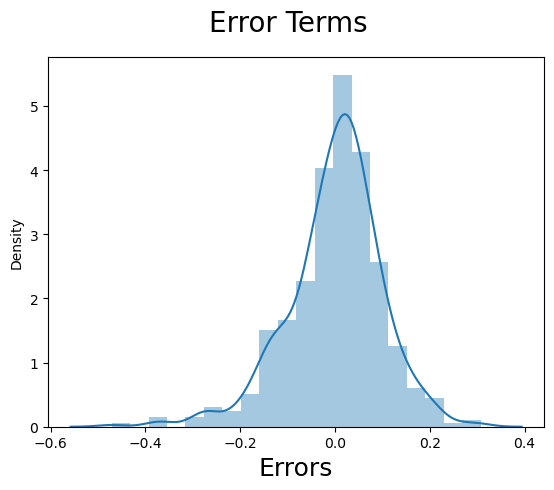

In [79]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
# Plot heading
fig.suptitle('Error Terms', fontsize = 20)    
# Give the X-label
plt.xlabel('Errors', fontsize = 18) 
plt.show()

In [80]:
# Scaling the test Data
df_test[numerical_cols]=scaler.transform(df_test[numerical_cols])

In [81]:
y_test=df_test.pop('cnt')
X_test=df_test

In [82]:
selected_cols=c.columns
selected_cols

Index(['yr', 'holiday', 'temp', 'windspeed', 'season_spring', 'season_winter',
       'mnth_Jul', 'weathersit_Light_Snow'],
      dtype='object')

In [83]:
X_test_rfe=X_test[selected_cols]

In [84]:
# Add a constant to the test set created
X_test_rfe = sm.add_constant(X_test_rfe)
X_test_rfe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   const                  219 non-null    float64
 1   yr                     219 non-null    int64  
 2   holiday                219 non-null    int64  
 3   temp                   219 non-null    float64
 4   windspeed              219 non-null    float64
 5   season_spring          219 non-null    uint8  
 6   season_winter          219 non-null    uint8  
 7   mnth_Jul               219 non-null    uint8  
 8   weathersit_Light_Snow  219 non-null    uint8  
dtypes: float64(3), int64(2), uint8(4)
memory usage: 11.1 KB


In [85]:
# Making predictions
y_pred = lm.predict(X_test_rfe)

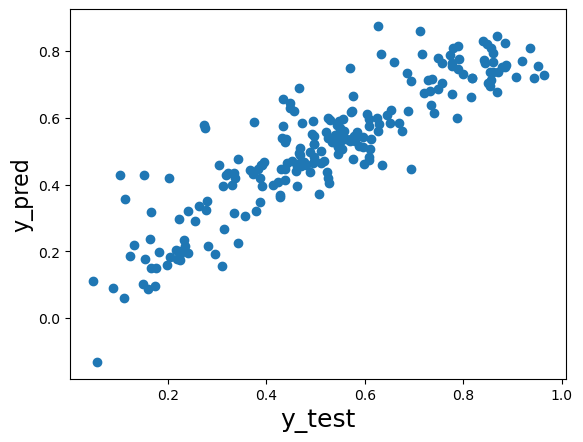

In [86]:
 # Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel('y_test', fontsize = 18)                     
plt.ylabel('y_pred', fontsize = 16)  
plt.show()

In [87]:
# r2_score
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.787846218596671

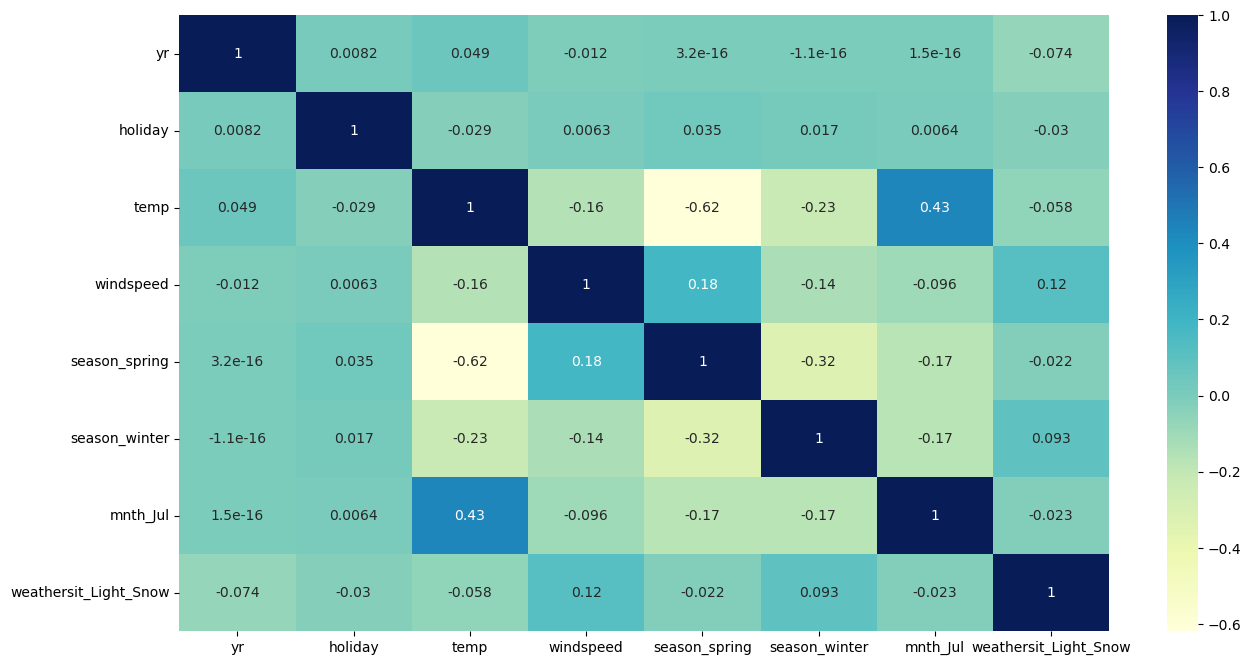

In [88]:
# Figure size
plt.figure(figsize=(15,8))
# Heatmap
sns.heatmap(bikers_df[selected_cols].corr(), cmap="YlGnBu", annot=True)
plt.show()